In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
user_profile = pd.read_csv("user_profiles.csv")
user_profile = user_profile.drop(columns=['Unnamed: 0'])
restaurant_profile = pd.read_csv("restaurant_profiles.csv")
restaurant_profile = restaurant_profile.drop(columns=['Unnamed: 0'])

In [3]:
user_profile

,user_id,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
0,---r61b7EpVPkb4UVme5tA,0.149137,0.005005,0.005000,0.395696,0.430137,0.005009,0.005001,0.005015
1,--0kuuLmuYBe3Rmu0Iycww,0.373362,0.160772,0.122085,0.005390,0.156996,0.170622,0.005386,0.005387
2,--2tyArRmSoyKx5r-FVG0A,0.257389,0.009424,0.013265,0.180111,0.185537,0.197084,0.096957,0.060232
3,--2vR0DIsmQ6WfcSzKWigw,0.033140,0.009672,0.812296,0.013007,0.012538,0.021357,0.097229,0.000761
4,--4AjktZiHowEIBCMd4CZA,0.206812,0.005182,0.017323,0.049723,0.425025,0.080224,0.049057,0.166654
...,...,...,...,...,...,...,...,...,...
159922,zzrhWsiCwAKQzbgMZIOtgg,0.230308,0.045626,0.063714,0.082449,0.372313,0.085547,0.103842,0.016201
159923,zztAOHhlNfNzOxUeyxeyFw,0.356585,0.005961,0.005957,0.005964,0.430900,0.122631,0.066047,0.005957
159924,zzvCl_egPyWpxO7EvWc2IA,0.004241,0.067078,0.004237,0.149818,0.644001,0.059269,0.067116,0.004239
159925,zzwYLnmIvj8C7wJmRjtkRA,0.042339,0.122963,0.006520,0.006525,0.709200,0.099399,0.006525,0.006529


In [4]:
restaurant_profile

,business_id,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
0,-0M0b-XhtFagyLmsBtOe8w,0.078602,0.046403,0.022593,0.140175,0.436417,0.175497,0.080066,0.020248
1,-0PN_KFPtbnLQZEeb23XiA,0.402912,0.018541,0.005863,0.084059,0.078386,0.047164,0.063135,0.299939
2,-0TffRSXXIlBYVbb5AwfTg,0.108954,0.216670,0.018824,0.104431,0.367122,0.047990,0.033901,0.102109
3,-0eUa8TsXFFy0FCxHYmrjg,0.418875,0.053791,0.043648,0.096559,0.211321,0.037843,0.081673,0.056292
4,-1B9pP_CrRBJYPICE5WbRA,0.082961,0.078748,0.013261,0.108814,0.360558,0.038375,0.020408,0.296874
...,...,...,...,...,...,...,...,...,...
5772,zxY4DgtXsVHihSUpsmwamg,0.641424,0.130154,0.012577,0.066264,0.075898,0.037468,0.031334,0.004880
5773,zy7uNOvpykrq-XlmDY_wHA,0.248098,0.050230,0.022135,0.199817,0.365974,0.024520,0.074811,0.014414
5774,zyMkbavgHASQtqVwaock9A,0.678724,0.030783,0.018321,0.031066,0.141033,0.033699,0.032831,0.033543
5775,zz-fcqurtm77bZ_rVvo2Lw,0.463548,0.108644,0.059583,0.041887,0.111181,0.117334,0.068131,0.029690


In [5]:
reviews = pd.read_csv("yelp_academic_dataset_review.csv")
businesses = pd.read_csv("yelp_academic_dataset_business.csv")

In [6]:
reviews = reviews.merge(businesses, how='left', on='business_id')
reviews = reviews[(reviews['city'] == 'Philadelphia') & (reviews['categories'].str.contains('Restaurants', na=False))]
reviews.reset_index(drop=True, inplace=True)
reviews = reviews[['user_id', 'business_id', 'stars_x']]
reviews

,user_id,business_id,stars_x
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0
1,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0
2,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
3,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0
4,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0
...,...,...,...
687284,ua6QuBe6mar6pDrhHETzJQ,Bk_1vsPtOtO0bojfQZQIOw,2.0
687285,LHWtjTG7e1NzNPYUbUo-9w,rgeuy1qbw6Z8B6CSVANHIA,5.0
687286,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3.0
687287,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3.0


In [7]:
# counts
user_counts = reviews['user_id'].value_counts()
restaurant_counts = reviews['business_id'].value_counts()

# creating filters
users_with_5_plus_reviews = user_counts[user_counts >= 5].index
restaurants_with_5_plus_reviews = restaurant_counts[restaurant_counts >= 5].index

# applying filters to reviews df
filtered_reviews = reviews[
    (reviews['user_id'].isin(users_with_5_plus_reviews)) &
    (reviews['business_id'].isin(restaurants_with_5_plus_reviews))
]

filtered_reviews.reset_index(drop=True, inplace=True)
filtered_reviews

# Some restaurantes appear only once because although they have 5+ reviews, some reviews were deleted because the users don't have 5+ reviews
# Doesn't matter because the profile is valid anyway

,user_id,business_id,stars_x
0,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
1,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0
2,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0
3,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0
4,IKbjLnfBQtEyVzEu8CuOLg,VJEzpfLs_Jnzgqh5A_FVTg,4.0
...,...,...,...
415107,ua6QuBe6mar6pDrhHETzJQ,Bk_1vsPtOtO0bojfQZQIOw,2.0
415108,LHWtjTG7e1NzNPYUbUo-9w,rgeuy1qbw6Z8B6CSVANHIA,5.0
415109,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3.0
415110,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3.0


In [8]:
sample = filtered_reviews.sample(100000, random_state=10)
sample.reset_index(drop=True, inplace=True)
sample

,user_id,business_id,stars_x
0,dootbuF6YgSygb32DIqwQA,ckbvLKwjEb836t-EDKsVVg,3.0
1,TSw2FmUF4-ud_d0INYKg6w,BgQOm2TuoF1UmD4e7BOUjA,5.0
2,fjzdwKoo7iTf7zf5ouZRVA,ENhzvzEbixDwE3f5G-shbg,5.0
3,aQmA4I6OnCPAvAzWL14QAQ,sVZb87xjhbCWHQ2UXOGLrA,3.0
4,2XBcnIVhp_pEeer-asuxHA,dwJL0XiFv7EgCts-wjQpwg,5.0
...,...,...,...
99995,VWTPfyRhxrYsWn5eSfRPRA,4_-IcMpkF_sBRHomWZHNzA,4.0
99996,KM76791235_ozKYDmvLBIg,AaTpjyw-EiODgi3tR4Xr-g,3.0
99997,kAE7vcgafLO5N6WmG2PJVg,eJaeTZlIdM3HWCq__Ve4Wg,4.0
99998,WigNIg2Nzn7kBRSA4ByA9g,9PZxjhTIU7OgPIzuGi89Ew,2.0


In [8]:
sample = filtered_reviews

In [9]:
sample = sample.merge(user_profile, how='left', on='user_id').merge(restaurant_profile, how='left', on='business_id')
sample.dropna(inplace=True)
sample.reset_index(drop=True, inplace=True)
sample

,user_id,business_id,stars_x,topic_1_x,topic_2_x,topic_3_x,topic_4_x,topic_5_x,topic_6_x,topic_7_x,topic_8_x,topic_1_y,topic_2_y,topic_3_y,topic_4_y,topic_5_y,topic_6_y,topic_7_y,topic_8_y
0,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0.270545,0.095412,0.068535,0.113107,0.292965,0.050481,0.042119,0.066836,0.193459,0.168505,0.039297,0.116575,0.362488,0.042650,0.036764,0.040261
1,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0,0.339913,0.064290,0.020299,0.102022,0.205278,0.032287,0.063012,0.172899,0.265852,0.017113,0.037027,0.070089,0.241778,0.085687,0.261462,0.020992
2,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0.276667,0.084080,0.025833,0.032345,0.291404,0.051164,0.070842,0.167666,0.540299,0.044033,0.040627,0.064068,0.119971,0.076313,0.077318,0.037371
3,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0,0.298771,0.102285,0.033909,0.114632,0.172562,0.139983,0.053584,0.084275,0.392488,0.079306,0.017424,0.096004,0.232563,0.138837,0.024440,0.018938
4,IKbjLnfBQtEyVzEu8CuOLg,VJEzpfLs_Jnzgqh5A_FVTg,4.0,0.266391,0.131776,0.043460,0.147131,0.212471,0.054313,0.039506,0.104953,0.074803,0.062781,0.014020,0.118137,0.435460,0.032262,0.022193,0.240344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413429,ua6QuBe6mar6pDrhHETzJQ,Bk_1vsPtOtO0bojfQZQIOw,2.0,0.183748,0.171753,0.018350,0.093122,0.138666,0.111405,0.080694,0.202263,0.186466,0.049254,0.008332,0.112453,0.231478,0.056261,0.021879,0.333877
413430,LHWtjTG7e1NzNPYUbUo-9w,rgeuy1qbw6Z8B6CSVANHIA,5.0,0.298093,0.076952,0.050384,0.061784,0.259631,0.100625,0.072467,0.080064,0.393311,0.065961,0.224989,0.075995,0.074418,0.050188,0.047815,0.067324
413431,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3.0,0.236301,0.002732,0.026815,0.078984,0.196611,0.076081,0.048852,0.333623,0.443016,0.024865,0.059093,0.056311,0.148402,0.077780,0.151275,0.039257
413432,am7-gkH_PDz598oTdYSD6A,3gVSrS4kffGGZT8oXHsIcw,3.0,0.315252,0.117957,0.053317,0.135085,0.204851,0.061038,0.041129,0.071371,0.090290,0.072885,0.021087,0.108029,0.351369,0.080120,0.031680,0.244540


In [10]:
x_user = sample.iloc[:, 3:11]
x_restaurant = sample.iloc[:, 11:]
y = sample['stars_x']

In [11]:
# split
x_user_train, x_user_test, x_restaurant_train, x_restaurant_test, y_train, y_test = train_test_split(
    x_user, x_restaurant, y, test_size=0.2, random_state=42
)

# Model

In [12]:
user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32)
])

restaurant_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32)
])

In [13]:
# user input and normalization
input_user = tf.keras.layers.Input(shape = x_user.shape[1])
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

In [14]:
# restaurant input and normalization
input_restaurant = tf.keras.layers.Input(shape = x_restaurant.shape[1])
vr = restaurant_NN(input_restaurant)
vr = tf.linalg.l2_normalize(vr, axis=1)

In [15]:
# similarity between output vectors
dot_product = tf.keras.layers.Dot(axes=1)([vu, vr])

# scaling to 1-5 range
output = tf.keras.layers.Lambda(lambda x: 2 * x + 3)(dot_product)

In [16]:
# model
model = tf.keras.Model([input_user, input_restaurant], output)

# cost function for regression
cost_fn = tf.keras.losses.MeanSquaredError()

~35 minutes to train (100 epochs) | 280 minutes (500 epochs)

In [17]:
tf.random.set_seed(10)
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=cost_fn)
history = model.fit([x_user_train, x_restaurant_train], y_train, epochs=500)

Epoch 1/500
10336/10336 [==============================] - 22s 2ms/step - loss: 1.2956
Epoch 2/500
10336/10336 [==============================] - 22s 2ms/step - loss: 1.2653
Epoch 3/500
10336/10336 [==============================] - 22s 2ms/step - loss: 1.2536
Epoch 4/500
10336/10336 [==============================] - 19s 2ms/step - loss: 1.2444
Epoch 5/500
10336/10336 [==============================] - 19s 2ms/step - loss: 1.2370
Epoch 6/500
10336/10336 [==============================] - 19s 2ms/step - loss: 1.2304
Epoch 7/500
10336/10336 [==============================] - 19s 2ms/step - loss: 1.2233
Epoch 8/500
10336/10336 [==============================] - 19s 2ms/step - loss: 1.2193
Epoch 9/500
10336/10336 [==============================] - 19s 2ms/step - loss: 1.2139
Epoch 10/500
10336/10336 [==============================] - 19s 2ms/step - loss: 1.2096
Epoch 11/500
10336/10336 [==============================] - 19s 2ms/step - loss: 1.2062
Epoch 12/500
10336/10336 [===============

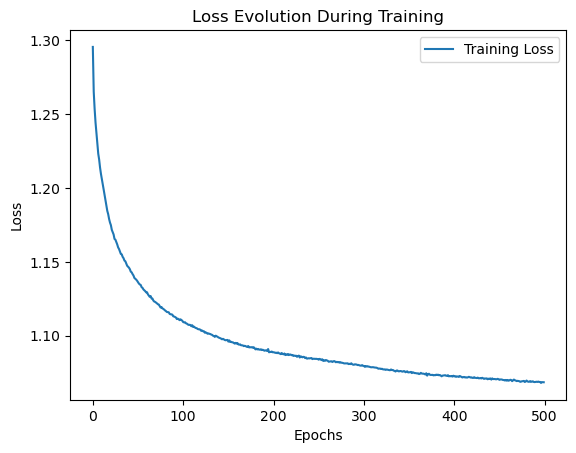

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Evolution During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("nn_loss_500", dpi=300)
plt.show()

In [19]:
model.evaluate([x_user_test, x_restaurant_test], y_test)

2584/2584 [==============================] - 6s 2ms/step - loss: 1.1368


1.1367685794830322

100 epochs: Training error: 1.1155 | Test error: 1.1511

500 epochs: Training error: 1.0684 | Test error: 1.1368

In [20]:
model.save('nn_model_500')

INFO:tensorflow:Assets written to: nn_model_500\assets
